# 1. Definition
A **multi-class classification** is a *classification technique that allows us to categorize data* with **more than two class labels.**

**Logistic regression** is a statistical method used for **binary classification,** which predicts the probability that a given input belongs to **one of two possible categories.** When dealing with **multiclass classification,** where there are **more than two classes,** logistic regression can be extended using techniques such as:

### A. One-vs-Rest (OvR) or One-vs-All (OvA):
* This approach involves training a **separate binary classifier for each class.** <br>
* For **each classifier, one class is treated as the positive class,** and all **other classes are treated as the negative class.**
* During prediction, the **class with the highest probability** is chosen as the final prediction.

### B. Multinomial Logistic Regression:
* Also known as **Softmax Regression,** this approach generalizes logistic regression to handle multiple classes directly.
* Instead of using a **single sigmoid function,** it uses the **softmax function** to **predict the probabilities of each class.**
* The **softmax function** ensures that the **sum of the predicted probabilities for all classes is equal to 1.**


**Thanks To:**
* [Optical Recognition of Handwritten Digits](https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits)
* [*sklearn.datasets*.**load_digits**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)
* [Recognizing hand-written digits](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)

# 2. Import libraries

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# 3. Load dataset

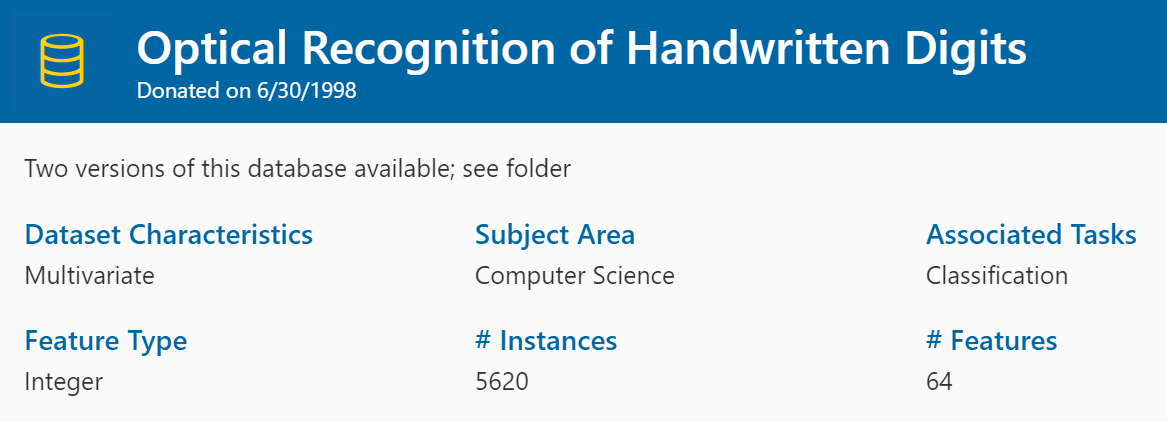

### Each datapoint is a 8x8 image of a digit.
##### from pixel_0_0 to pixel_0_7 like that
##### pixel_1_0 to pixel_1_7
#####. . .
##### pixel_7_0 to pixel_7_7

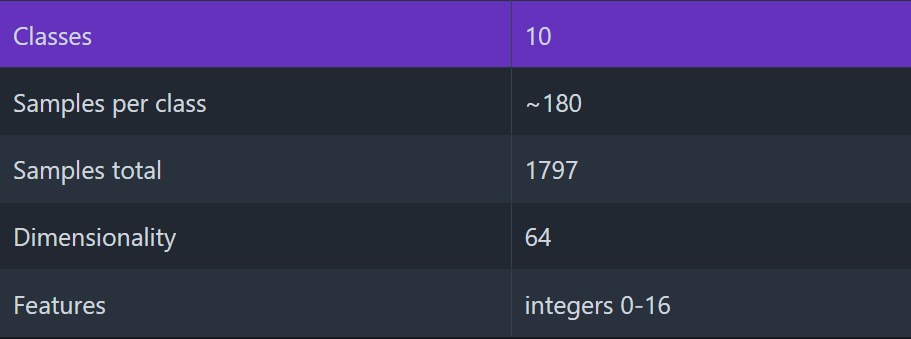

In [2]:
# load hand written digit dataset from sklearn library
digits = load_digits()
# read all the attributes of digit dataset
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

# 4. Dataset EDA (Exploratory Data Analysis)

In [3]:
# number of features int the digit dataset
len(digits.feature_names)

64

In [4]:
# feature's length of the dataset
len(digits.data)

1797

In [5]:
# target's length of the dataset
len(digits.target)

1797

In [6]:
# number of categories in the target
len(digits.target_names)

10

In [7]:
# different categories of the target
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# 5. Data Visualization

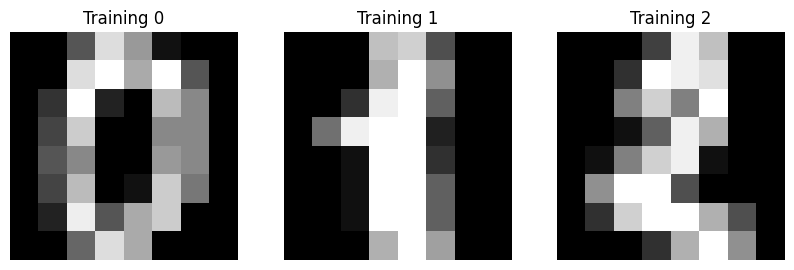

In [8]:
%matplotlib inline
# for i in range(3):
#   plt.matshow(digits.images[i])

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

for ax, img, label in zip(ax, digits.images, digits.target):
  ax.set_axis_off()
  ax.imshow(img, cmap=plt.cm.gray, interpolation='nearest')
  ax.set_title("Training %i" % label)

In [9]:
# plt.gray()
# for i in range(3):
#   plt.matshow(digits.images[i])

In [10]:
# verify the first 3 target from digit dataset
digits.target[0:3]

array([0, 1, 2])

In [21]:
# the first 3 target from digit dataset
digits.target_names[0:3]

array([0, 1, 2])

# 6. Split dataset into train and test data

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# split the digit dataset into training and test dataset.
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [13]:
# length of independent training dataset
len(X_train)

1347

In [14]:
# length of dependent training dataset
len(X_test)

450

# 7. Logistic Regression model creation

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

The warning you're seeing indicates that the Logistic Regression model in scikit-learn did not converge within the default number of iterations. Here are some steps you can take to resolve this issue:

#### 1. Increase the Number of Iterations:
You can increase the max_iter parameter, which sets the maximum number of iterations for the solver to converge.
```
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)  # Increase the number of iterations
model.fit(X, y)
```
#### 2. Scale the Data:
Scaling your data can improve convergence. Standardizing features by removing the mean and scaling to unit variance can help. You can use StandardScaler from scikit-learn for this purpose.
```
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
model = LogisticRegression(max_iter=200)
pipeline = make_pipeline(scaler, model)

pipeline.fit(X, y)
```
#### 3. Try Different Solvers:
You can try using different solvers like 'liblinear', 'saga', or 'newton-cg'. Different solvers have different strengths and might perform better depending on your data.
```
model = LogisticRegression(solver='liblinear')  # Try a different solver
model.fit(X, y)
```
#### 4. Refer to Documentation:
For more details, you can refer to the [scikit-learn documentation.](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
<br>
By applying one or a combination of these steps, you should be able to resolve the convergence warning.

In [23]:
model.predict(X_test)

array([5, 7, 2, 2, 6, 9, 1, 1, 5, 5, 0, 6, 4, 2, 0, 9, 6, 0, 5, 8, 6, 7,
       7, 7, 8, 1, 6, 6, 6, 7, 7, 0, 7, 6, 7, 5, 0, 2, 2, 3, 5, 0, 0, 0,
       9, 8, 6, 7, 2, 6, 3, 5, 8, 7, 0, 5, 9, 3, 2, 4, 9, 6, 1, 5, 8, 3,
       6, 3, 7, 9, 6, 3, 0, 6, 6, 6, 1, 7, 4, 3, 6, 8, 7, 9, 6, 5, 5, 7,
       6, 3, 1, 4, 9, 3, 2, 5, 2, 4, 7, 8, 2, 8, 4, 1, 1, 8, 2, 1, 2, 1,
       2, 4, 2, 7, 5, 5, 6, 1, 1, 6, 7, 4, 7, 2, 7, 7, 4, 5, 7, 7, 3, 5,
       7, 5, 5, 8, 1, 5, 2, 3, 3, 8, 5, 7, 8, 5, 8, 0, 7, 8, 1, 3, 8, 6,
       7, 6, 1, 5, 8, 4, 7, 5, 9, 0, 0, 4, 9, 4, 3, 5, 2, 3, 5, 1, 4, 5,
       5, 6, 5, 7, 0, 2, 5, 3, 7, 9, 7, 2, 1, 5, 8, 7, 3, 4, 5, 0, 1, 5,
       8, 2, 6, 7, 2, 9, 4, 1, 6, 3, 1, 0, 6, 6, 3, 1, 0, 2, 7, 9, 3, 0,
       5, 6, 1, 1, 1, 3, 3, 8, 4, 6, 3, 6, 4, 2, 5, 2, 8, 9, 3, 9, 4, 1,
       3, 4, 5, 8, 4, 1, 5, 0, 5, 8, 1, 0, 3, 2, 9, 8, 6, 9, 1, 5, 9, 6,
       4, 0, 8, 3, 3, 3, 8, 0, 4, 8, 6, 8, 8, 3, 9, 3, 0, 7, 1, 0, 1, 9,
       1, 7, 4, 6, 7, 2, 1, 1, 5, 5, 2, 8, 3, 8, 5,

In [24]:
model.score(X_test, y_test)

0.9711111111111111

In [25]:
model.predict([digits.data[2]])

array([2])

In [26]:
model.predict(digits.data[0:3])

array([0, 1, 2])

In [27]:
y_pred = model.predict(X_test)

# Confusion matrix

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 47,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 46,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0, 35,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  1, 54,  1,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 53,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 47,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 41,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 34]])

In [30]:
import seaborn as sb

Text(95.72222222222221, 0.5, 'True')

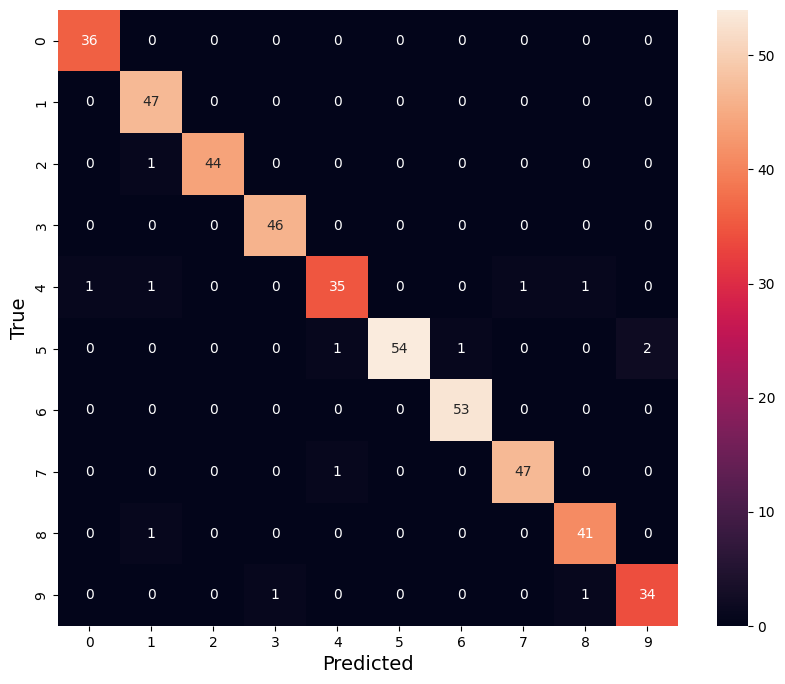

In [31]:
plt.figure(figsize=(10, 8))
sb.heatmap(cm, annot=True)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)